In [1]:
import math, pylab, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
from numpy import linalg as LA
from scipy.integrate import odeint
from matplotlib.colors import LogNorm
import numba

In [2]:
def SMatrix(la1,la2,la3,la4,la5):
    
    return [[(-3*la2)/(16.*math.pi),0,0,0,0,0,0,0,(-2*la3 - 2*la5)/(64.*math.pi),0,0,0,0,0,0,-la2/(16.*math.pi),0,0,0,0,0,(-2*la3 + 2*la5)/(64.*math.pi),0,
    0,0,0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),
    (-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0],[0,(-2*la3 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,la5/(16.*math.pi),0,0,0,0,0,0,
    0,0,0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),(2*la4 - 2*la5)/(32.*math.pi),(2*la4 - 2*la5)/(32.*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0],
    [0,0,0,0,0,0,0,0,0,0,la5/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,(-la3 + la5)/(16.*math.pi),0,0,0,0,0,la5/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),
    (2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),
    (2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),
    (2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),
    (2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [(-2*la3 - 2*la5)/(64.*math.pi),0,0,0,0,0,0,0,(-3*la1)/(16.*math.pi),0,0,0,0,0,0,(-2*la3 + 2*la5)/(64.*math.pi),0,0,0,0,0,-la1/(16.*math.pi),0,0,0,
    0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0],[0,0,0,la5/(16.*math.pi),0,0,0,0,0,(-2*la3 + 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,la5/(16.*math.pi),0,0,0,0,0,0,0,-la1/(8.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,(2*la4 - 2*la5)/(32.*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [-la2/(16.*math.pi),0,0,0,0,0,0,0,(-2*la3 + 2*la5)/(64.*math.pi),0,0,0,0,0,0,(-3*la2)/(16.*math.pi),0,0,0,0,0,(-2*la3 - 2*la5)/(64.*math.pi),0,0,0,
    0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),
    (-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0],[0,la5/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-la3 - la5)/(16.*math.pi),0,0,0,0,0,0,0,0,
    0,0,0,0,(-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,(-2*la4 + 2*la5)/(32.*math.pi),
    (-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,(-2*la4 + 2*la5)/(32.*math.pi),
    (-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,
    (-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la2 - la3 - la4)/(16.*math.pi),(-2*la2 - la3 - la4)/(16.*math.pi),0,0,0,
    (-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,0,0,0,0,0,0],
    [(-2*la3 + 2*la5)/(64.*math.pi),0,0,0,0,0,0,0,-la1/(16.*math.pi),0,0,0,0,0,0,(-2*la3 - 2*la5)/(64.*math.pi),0,0,0,0,0,(-3*la1)/(16.*math.pi),0,0,0,
    0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la4 + 2*la5)/(32.*math.pi),
    (-2*la4 + 2*la5)/(32.*math.pi),0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),(-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la4 + 2*la5)/(32.*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,(-2*la1 - la3 - la4)/(16.*math.pi),
    (-2*la1 - la3 - la4)/(16.*math.pi),0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi),0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi),0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi),0,0,0,0,0,0,0],
    [(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,
    (-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,0,
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),0,0,0],
    [(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,
    (-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,0,
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),0,0,0],
    [(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,
    (-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,0,
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),0,0,0],
    [(-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(2*la4 - 2*la5)/(32.*math.pi),0,0,0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,
    (-2*la2 - la3 - la4)/(16.*math.sqrt(2)*math.pi),(-2*la4 + 2*la5)/(32.*math.pi),0,0,0,0,(-2*la1 - la3 - la4)/(16.*math.sqrt(2)*math.pi),0,0,0,0,0,0,0,
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi)],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi)],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi),
    (-2*la1 - 2*la2 - 2*la3 - 2*la5)/(8.*math.sqrt(2)*math.pi),(-2*la1 - 2*la2 - 2*la3 - 2*la5)/(16.*math.pi)]]

def RGEs(x,t):
    MHD = x[0]; MHU = x[1]; v = x[2]; g1 = x[3]; g2 = x[4]; g3 = x[5]
    Ye11 = x[6]; Ye22 = x[7]; Ye33 = x[8]; Yd11 = x[9]; Yd22 = x[10]; Yd33 = x[11];
    Yu11 = x[12]; Yu22 = x[13]; Yu33 = x[14]; la5 = x[15]; la1 = x[16]; la4 = x[17]; 
    la3 = x[18]; la2 = x[19];
    
    MHDp = (math.log(10)*((-9*g1**2*MHD)/10. - (9*g2**2*MHD)/2. + 12*la1*MHD + 4*la3*MHU + 2*la4*MHU + 
      6*MHD*(Yd11**2 + Yd22**2 + Yd33**2) + 2*MHD*(Ye11**2 + Ye22**2 + Ye33**2) + 
      6*MHD*(Yu11**2 + Yu22**2 + Yu33**2)))/(16.*math.pi**2)
    MHUp = (math.log(10)*(4*la3*MHD + 2*la4*MHD - (3*(3*g1**2 + 15*g2**2 - 40*la2)*MHU)/10.))/(16.*math.pi**2)
    vp = (math.log(10)*v*(9*g1**2 + 3*g1**2 + 45*g2**2 + 15*g2**2 - 60*(Yd11**2 + Yd22**2 + Yd33**2) - 
      20*(Ye11**2 + Ye22**2 + Ye33**2) - 60*(Yu11**2 + Yu22**2 + Yu33**2)))/(320.*math.pi**2)
    g1p = (21*g1**3*math.log(10))/(80.*math.pi**2)
    g2p = (-3*g2**3*math.log(10))/(16.*math.pi**2)
    g3p = (-7*g3**3*math.log(10))/(16.*math.pi**2)
    Ye11 = (math.log(10)*((3*Ye11**3)/2. + Ye11*((-9*g1**2)/4. - (9*g2**2)/4. + 3*(Yd11**2 + Yd22**2 + Yd33**2) + 
         Ye11**2 + Ye22**2 + Ye33**2 + 3*(Yu11**2 + Yu22**2 + Yu33**2))))/(16.*math.pi**2)
    Ye22 = (math.log(10)*((3*Ye22**3)/2. + Ye22*((-9*g1**2)/4. - (9*g2**2)/4. + 3*(Yd11**2 + Yd22**2 + Yd33**2) + 
         Ye11**2 + Ye22**2 + Ye33**2 + 3*(Yu11**2 + Yu22**2 + Yu33**2))))/(16.*math.pi**2)
    Ye33 = (math.log(10)*((3*Ye33**3)/2. + Ye33*((-9*g1**2)/4. - (9*g2**2)/4. + 3*(Yd11**2 + Yd22**2 + Yd33**2) + 
         Ye11**2 + Ye22**2 + Ye33**2 + 3*(Yu11**2 + Yu22**2 + Yu33**2))))/(16.*math.pi**2)
    Yd11 = (math.log(10)*(6*(Yd11**3 - Yd11*Yu11**2) - 
      Yd11*(g1**2 + 9*g2**2 + 32*g3**2 - 12*(Yd11**2 + Yd22**2 + Yd33**2) - 
         4*(Ye11**2 + Ye22**2 + Ye33**2) - 12*(Yu11**2 + Yu22**2 + Yu33**2))))/(64.*math.pi**2)
    Yd22 = (math.log(10)*(6*(Yd22**3 - Yd22*Yu22**2) - 
      Yd22*(g1**2 + 9*g2**2 + 32*g3**2 - 12*(Yd11**2 + Yd22**2 + Yd33**2) - 
         4*(Ye11**2 + Ye22**2 + Ye33**2) - 12*(Yu11**2 + Yu22**2 + Yu33**2))))/(64.*math.pi**2)
    Yd33 = (math.log(10)*(6*(Yd33**3 - Yd33*Yu33**2) - 
      Yd33*(g1**2 + 9*g2**2 + 32*g3**2 - 12*(Yd11**2 + Yd22**2 + Yd33**2) - 
         4*(Ye11**2 + Ye22**2 + Ye33**2) - 12*(Yu11**2 + Yu22**2 + Yu33**2))))/(64.*math.pi**2)
    Yu11 = (math.log(10)*((-3*(Yd11**2*Yu11 - Yu11**3))/2. + 
      Yu11*((-17*g1**2)/20. - (9*g2**2)/4. - 8*g3**2 + 3*(Yd11**2 + Yd22**2 + Yd33**2) + Ye11**2 + 
         Ye22**2 + Ye33**2 + 3*(Yu11**2 + Yu22**2 + Yu33**2))))/(16.*math.pi**2)
    Yu22 = (math.log(10)*((-3*(Yd22**2*Yu22 - Yu22**3))/2. + 
      Yu22*((-17*g1**2)/20. - (9*g2**2)/4. - 8*g3**2 + 3*(Yd11**2 + Yd22**2 + Yd33**2) + Ye11**2 + 
         Ye22**2 + Ye33**2 + 3*(Yu11**2 + Yu22**2 + Yu33**2))))/(16.*math.pi**2)
    Yu33 = (math.log(10)*((-3*(Yd33**2*Yu33 - Yu33**3))/2. + 
      Yu33*((-17*g1**2)/20. - (9*g2**2)/4. - 8*g3**2 + 3*(Yd11**2 + Yd22**2 + Yd33**2) + Ye11**2 + 
         Ye22**2 + Ye33**2 + 3*(Yu11**2 + Yu22**2 + Yu33**2))))/(16.*math.pi**2)
    la5 = (math.log(10)*((-9*g1**2*la5)/5. - 9*g2**2*la5 + 4*la1*la5 + 4*la2*la5 + 8*la3*la5 - 4*la4*la5 + 
      6*la5*(Yd11**2 + Yd22**2 + Yd33**2) + 2*la5*(Ye11**2 + Ye22**2 + Ye33**2) + 
      6*la5*(Yu11**2 + Yu22**2 + Yu33**2)))/(16.*math.pi**2)
    la1 = (math.log(10)*((27*g1**4)/200. + (9*g1**2*g2**2)/20. + (9*g2**4)/8. - (9*g1**2*la1)/5. - 9*g2**2*la1 + 
      24*la1**2 + 2*la3**2 + 2*la3*la4 + la4**2 + la5**2 + 12*la1*(Yd11**2 + Yd22**2 + Yd33**2) - 
      6*(Yd11**4 + Yd22**4 + Yd33**4) + 4*la1*(Ye11**2 + Ye22**2 + Ye33**2) - 
      2*(Ye11**4 + Ye22**4 + Ye33**4) + 12*la1*(Yu11**2 + Yu22**2 + Yu33**2) - 
      6*(Yu11**4 + Yu22**4 + Yu33**4)))/(16.*math.pi**2)
    la4 = (math.log(10)*((-9*g1**2*g2**2)/5. - (9*g1**2*la4)/5. - 9*g2**2*la4 + 4*la1*la4 + 4*la2*la4 + 
      8*la3*la4 + 4*la4**2 - 8*la5**2 + 6*la4*(Yd11**2 + Yd22**2 + Yd33**2) + 
      2*la4*(Ye11**2 + Ye22**2 + Ye33**2) + 6*la4*(Yu11**2 + Yu22**2 + Yu33**2)))/(16.*math.pi**2) 
    la3 = (math.log(10)*((27*g1**4)/100. + (9*g1**2*g2**2)/10. + (9*g2**4)/4. - (9*g1**2*la3)/5. - 9*g2**2*la3 + 
      12*la1*la3 + 12*la2*la3 + 4*la3**2 + 4*la1*la4 + 4*la2*la4 + 2*la4**2 + 10*la5**2 + 
      6*la3*(Yd11**2 + Yd22**2 + Yd33**2) + 2*la3*(Ye11**2 + Ye22**2 + Ye33**2) + 
      6*la3*(Yu11**2 + Yu22**2 + Yu33**2)))/(16.*math.pi**2)
    la2 = (((27*g1**4)/200. + (9*g2**4)/8. + (9*g1**2*(g2**2 - 4*la2))/20. - 9*g2**2*la2 + 24*la2**2 + 2*la3**2 + 
      2*la3*la4 + la4**2 + la5**2)*math.log(10))/(16.*math.pi**2)
    
    return [MHD, MHU, v, g1, g2, g3, Ye11, Ye22, Ye33, Yd11, Yd22, Yd33, 
            Yu11, Yu22, Yu33, la5, la1, la4, la3, la2]

In [3]:
def testing(i):
    
    la1 = 0.129
    la2 = 10**(4.549*np.random.uniform(0,1)-4)
    la3 = 10**(4.549*np.random.uniform(0,1)-4) * random.choice([-1,1])
    la4 = 10**(4.549*np.random.uniform(0,1)-4) * random.choice([-1,1])
    la5 = 10**(4.549*np.random.uniform(0,1)-4) * random.choice([-1,1])
    
    eig = pd.DataFrame(LA.eig(SMatrix(la1,la2,la3,la4,la5))[0], columns = ['value'])
    test = np.all(np.abs(np.real(eig['value'])) < 0.5)
    
   # if(i % 100 == 0):
   #     print(time.time()-init)
    
    if(test == True):
        return [la2,la3,la4,la5]

In [4]:
data_no_parallel = [ ]
init = time.time()
for i in range(1000):
    data_no_parallel.append(testing(i))
print(time.time()-init)

1.9726283550262451


In [11]:
pool = mp.Pool(4)
init = time.time()
data_parallel = [pool.apply(testing, args = (i, )) for i in range(1000)]
print(time.time()-init)

3.027585506439209


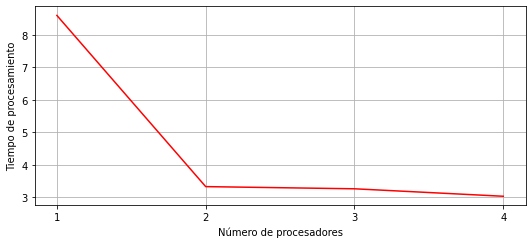

In [21]:
cores = [1,2,3,4]
times = [8.59927,3.32474,3.25778,3.02758]
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(cores,times,c='red')
new_list = range(math.floor(min(cores)), math.ceil(max(cores))+1)
plt.xticks(new_list)
plt.xlabel('Número de procesadores')
plt.ylabel('Tiempo de procesamiento')
plt.grid()
plt.savefig('plots/time1.pdf')

In [107]:
t = np.linspace(2.5,5,100)
listt = [ ]
#def RGEsUnit(i):
init = time.time()

for i in range(10):    
    la50 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la40 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la30 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la20 = 10 ** (4.549 * np.random.uniform(0,1) - 4)

    x0 = [125, 0, 246, 0.35760*math.sqrt(5/3), 0.64822, 1.1666, 0, 0, 0, 0, 0, 0, 
          0, 0, 0.93849, la50, 0.1296, la40, la30, la20]

    x = odeint(RGEs,x0,t)
    
    
    
    for tt in range(len(t)):
        eig = pd.DataFrame(LA.eig(SMatrix(x[tt,16],x[tt,19],x[tt,18],x[tt,17],x[tt,15]))[0], columns = ['value'])
        test = np.all(np.abs(np.real(eig['value'])) < 0.5)
        if(test == False):
            break
        if(tt == max(t) and test == True):
            #return [x[0,16],x[0,19],x[0,18],x[0,17],x[0,15]]
            listt.append([x[0,16],x[0,19],x[0,18],x[0,17],x[0,15]])
print(time.time()-init)

SyntaxError: invalid syntax (<ipython-input-107-96f0f7390b0c>, line 19)

SyntaxError: unexpected EOF while parsing (<ipython-input-103-72908230d393>, line 1)

In [5]:
scale = [10**0,10**1,10**2,10**3,10**4]
time_no_numba = [0.71716,7.15109,55.53379, 647.09238, 6090.39782]
time_numba = [0.35244,3.4607,35.00315, 348.24874, 3125.82486]

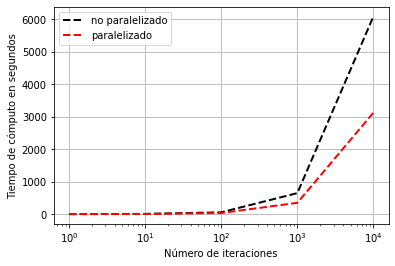

In [10]:
plt.plot(scale,time_no_numba, lw = 2, ls = '--', c = 'black', label = 'no paralelizado')
plt.plot(scale,time_numba, lw = 2, ls = '--', c = 'red', label = 'paralelizado')
plt.xscale('log')
#plt.yscale('log')
plt.grid()
plt.xlabel('Número de iteraciones')
plt.ylabel('Tiempo de cómputo en segundos')
plt.legend()
plt.savefig('plots/time2.pdf');

In [79]:
np.savetxt('data11.dat',listt)

In [80]:
data1 = np.loadtxt('data11.dat')

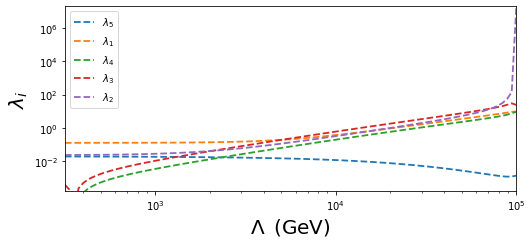

In [72]:
inits = [np.abs(x[0,15]),np.abs(x[0,16]),np.abs(x[0,17]),np.abs(x[0,18]),np.abs(x[0,19])]
ends = [np.abs(x[99,15]),np.abs(x[99,16]),np.abs(x[99,17]),np.abs(x[99,18]),np.abs(x[99,19])]

plt.plot(10**t,np.abs(x[:,15]), '--', lw = '1.8', label = '$\lambda_5$')
plt.plot(10**t,np.abs(x[:,16]), '--', lw = '1.8', label = '$\lambda_1$')
plt.plot(10**t,np.abs(x[:,17]), '--', lw = '1.8', label = '$\lambda_4$')
plt.plot(10**t,np.abs(x[:,18]), '--', lw = '1.8', label = '$\lambda_3$')
plt.plot(10**t,np.abs(x[:,19]), '--', lw = '1.8', label = '$\lambda_2$')
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**2.5, 10**5])
plt.ylim([min(inits), max(ends)])
plt.legend()
plt.xlabel(r'$\Lambda \,$ (GeV)', size=20)
plt.ylabel(r'$\lambda_i$', size=20)
plt.savefig('plots/scales.pdf');

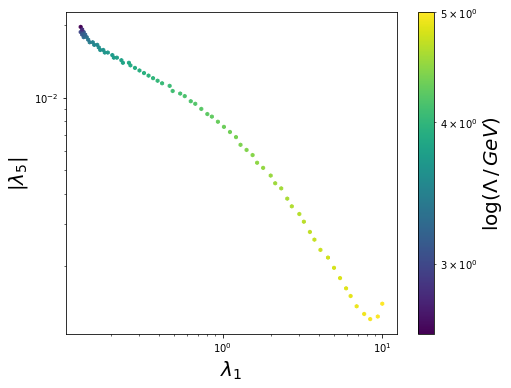

In [67]:
plt.figure(figsize=(7.2,5.5))
plt.hexbin(np.abs(x[:,16]), np.abs(x[:,15]), t, 
           gridsize=100, xscale='log', yscale='log', norm=LogNorm())
c=plt.colorbar()
c.set_label(r'$\log(\Lambda \,/ \,GeV)$', size=20)

plt.xlabel(r'$\lambda_1$',size=20)
plt.ylabel(r'$|\lambda_5|$',size=20);
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(10,80)
#plt.ylim(1e-13,1e-9)
#plt.legend(loc='upper right')
plt.savefig("plots/la5la1scale.pdf");

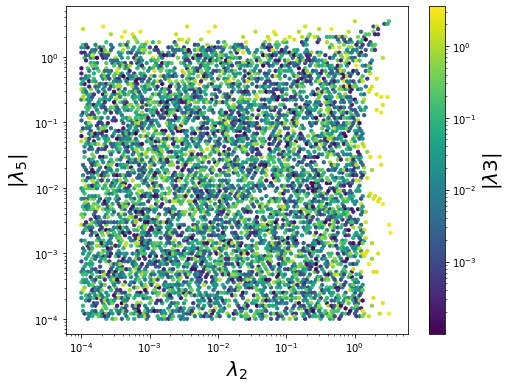

In [81]:
data1 = pd.DataFrame(listt, columns = ['la1','la2','la3','la4','la5'])
plt.figure(figsize=(7.2,5.5))
plt.hexbin(np.abs(data1['la2']), np.abs(data1['la5']), np.abs(data1['la3']), 
           gridsize=100, xscale='log', yscale='log', norm=LogNorm())
c=plt.colorbar()
c.set_label(r'$|\lambda3|$', size=20)

plt.xlabel(r'$\lambda_2$',size=20)
plt.ylabel(r'$|\lambda_5|$',size=20);

plt.savefig("plots/la5la2la3.pdf");

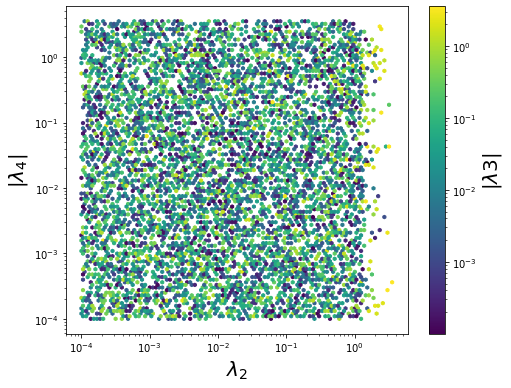

In [92]:
data1 = pd.DataFrame(listt, columns = ['la1','la2','la3','la4','la5'])
plt.figure(figsize=(7.2,5.5))
plt.hexbin(np.abs(data1['la2']), np.abs(data1['la4']), np.abs(data1['la3']), 
           gridsize=100, xscale='log', yscale='log', norm=LogNorm())
c=plt.colorbar()
c.set_label(r'$|\lambda3|$', size=20)

plt.xlabel(r'$\lambda_2$',size=20)
plt.ylabel(r'$|\lambda_4|$',size=20);

plt.savefig("plots/la2la4la3.pdf");

<ipython-input-91-5693ee5e8d59>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y." (-> color='y'). The keyword argument will take precedence.
  plt.plot(0.5 * (data1['la3']+data1['la4']+data1['la5']), np.abs(data1['la2']), 'y.', c='black')


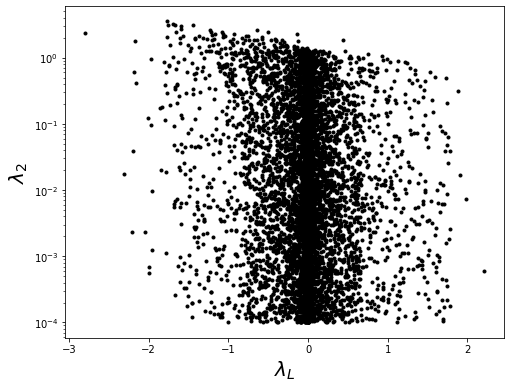

In [91]:
data1 = pd.DataFrame(listt, columns = ['la1','la2','la3','la4','la5'])
plt.figure(figsize=(7.2,5.5))
#plt.hexbin(,np.abs(data1['la3']), 
#           gridsize=100, xscale='log', yscale='log', norm=LogNorm())
#c=plt.colorbar()
#c.set_label(r'$|\lambda3|$', size=20)
plt.plot(0.5 * (data1['la3']+data1['la4']+data1['la5']), np.abs(data1['la2']), 'y.', c='black')
plt.ylabel(r'$\lambda_2$',size=20)
plt.xlabel(r'$\lambda_L$',size=20)
#plt.xscale('log')
plt.yscale('log')

plt.savefig("plots/la2laL.pdf");

In [5]:
def RGEsSolve(i):
    
    la50 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la40 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la30 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la20 = 10 ** (4.549 * np.random.uniform(0,1) - 4)

    x0 = [125, 0, 246, 0.35760*math.sqrt(5/3), 0.64822, 1.1666, 0, 0, 0, 0, 0, 0, 
          0, 0, 0.93849, la50, 0.1296, la40, la30, la20]

    return odeint(RGEs,x0,t)


def RGEsUnit(tt, i):

    x = RGEs(i)
    
    eig = pd.DataFrame(LA.eig(SMatrix(x[tt,16],x[tt,19],x[tt,18],x[tt,17],x[tt,15]))[0], columns = ['value'])
    test = np.all(np.abs(np.real(eig['value'])) < 0.5)
        
    if(tt == max(t) and test == True):
        return [x[0,16],x[0,19],x[0,18],x[0,17],x[0,15]]

In [55]:
r = [[pool.apply(RGEsUnit, args = (tt, i)) for tt in range(len(t))] for i in range(4)]

In [8]:
from multiprocessing import Process, Value, Array

t = np.linspace(2.5,5,100)

def RGEsUnit2(i):    
    la50 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la40 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la30 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
    la20 = 10 ** (4.549 * np.random.uniform(0,1) - 4)

    x0 = [125, 0, 246, 0.35760*math.sqrt(5/3), 0.64822, 1.1666, 0, 0, 0, 0, 0, 0, 
          0, 0, 0.93849, la50, 0.1296, la40, la30, la20]

    x = odeint(RGEs,x0,t)
    
    for tt in range(len(t)):
        eig = pd.DataFrame(LA.eig(SMatrix(x[tt,16],x[tt,19],x[tt,18],x[tt,17],x[tt,15]))[0], columns = ['value'])
        test = np.all(np.abs(np.real(eig['value'])) < 0.5)
        if(test == False):
            break
        if(tt == max(t) and test == True):
            return [x[0,16],x[0,19],x[0,18],x[0,17],x[0,15]]

In [115]:
t = np.linspace(2.5,5,100)
listt = [ ]

#init = time.time()


def RGEsUnit(n):

    for i in range(n):    
        la50 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
        la40 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
        la30 = 10 ** (4.549 * np.random.uniform(0,1) - 4) * random.choice([-1,1])
        la20 = 10 ** (4.549 * np.random.uniform(0,1) - 4)

        x0 = [125, 0, 246, 0.35760*math.sqrt(5/3), 0.64822, 1.1666, 0, 0, 0, 0, 0, 0, 
              0, 0, 0.93849, la50, 0.1296, la40, la30, la20]
        
        return odeint(RGEs,x0,t)
    
@numba.jit(nopython=True)
def proof(x):

    for tt in range(len(t)):
        eig = pd.DataFrame(LA.eig(SMatrix(x[tt,16],x[tt,19],x[tt,18],x[tt,17],x[tt,15]))[0], columns = ['value'])
        test = np.all(np.abs(np.real(eig['value'])) < 0.5)
        if(test == False):
            break
        if(tt == max(t) and test == True):
            return [x[0,16],x[0,19],x[0,18],x[0,17],x[0,15]]
            #listt.append([x[0,16],x[0,19],x[0,18],x[0,17],x[0,15]])
#print(time.time()-init)

In [114]:
pro

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'odeint':[0m [1m[1mCannot determine Numba type of <class 'function'>[0m
[1m
File "<ipython-input-112-1df214db5f2f>", line 18:[0m
[1mdef RGEsUnit(n):
    <source elided>

[1m        x = odeint(RGEs,x0,t)
[0m        [1m^[0m[0m
[0m